# Supervised Learning Regression Project: Cars4U

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv("used_cars_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
data = df.copy()

In [4]:
data.sample(10, random_state=2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,7.15,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,7.88,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,10.25,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,40.62,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,49.49,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,7.88,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,33.36,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,44.80,21.00


* The mileage column has values in km/kg and kmpl
* There's a few missing values
* Name values are a collection of brand name and model name, maybe we should split this up

In [5]:
data.shape

(7253, 14)

There's a total of 14 columns and 7253 rows. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* There are many string and numeric data types in the data. 
* The dependent variable is Price and it has a data type of float. 

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For Price, New_Price, and Kilometers_Driven there is a signficant difference between the 75th percentile and the max for each of these columns, which indicates that there may be outliers present. 

In [8]:
# checking for duplicate values in the data
df.duplicated().sum()

0

There are no duplicated values in the data. 

In [9]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

It appears we're missing some data from the Mileage, Engine, Power, Seats, and Price columns. 

## Let's split the name column into two additional columns called brand and model

In [10]:
brand = data.Name.str.split(" ", expand=True)[0]
data['Brand'] = brand
data['Brand']

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7253, dtype: object

In [11]:
model = data.Name.str.split(" ", expand=True)
model.drop(0, axis=1, inplace=True)
combined_models = model.apply(lambda x: ' '.join([e for e in x if e is not None]), axis=1)

data['Model'] = combined_models

In [12]:
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic


We now have a brand and model column

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the pricing of used cars distributed?
2. What is the market share of different brands in the used car market?
3. What is the market share of different types of fuels in the used car market?
4. How does the prices of used cars vary by car brand?
5. How does the prices of used cars vary by location?
6. What are the attributes that have a strong correlation with the price of used cars? 



In [13]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

## How is the pricing of used cards distributed?

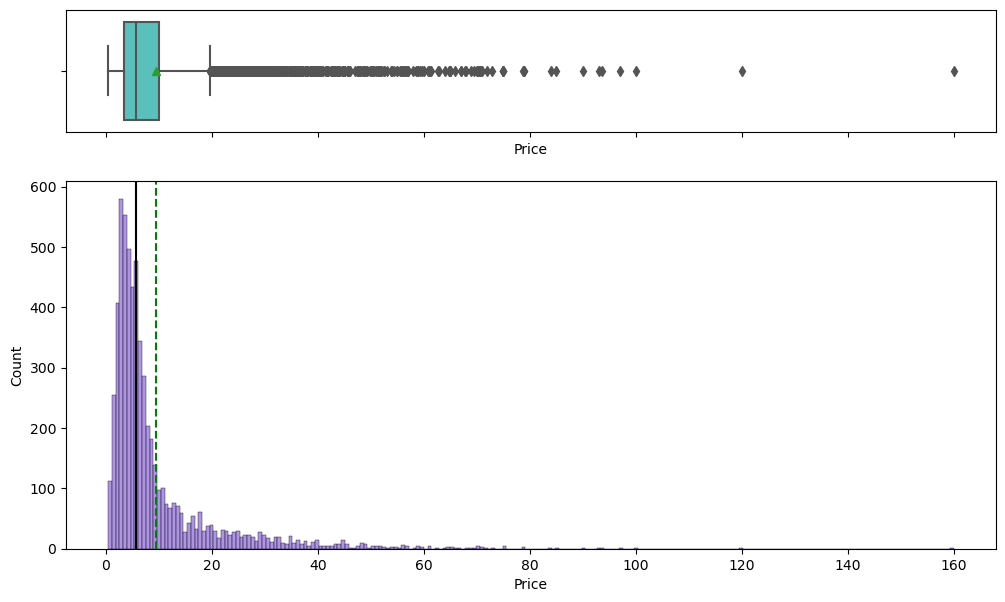

In [14]:
histogram_boxplot(data, 'Price');

* There are many outliers in the pricing of used cars
* Price is highly right skewed. 

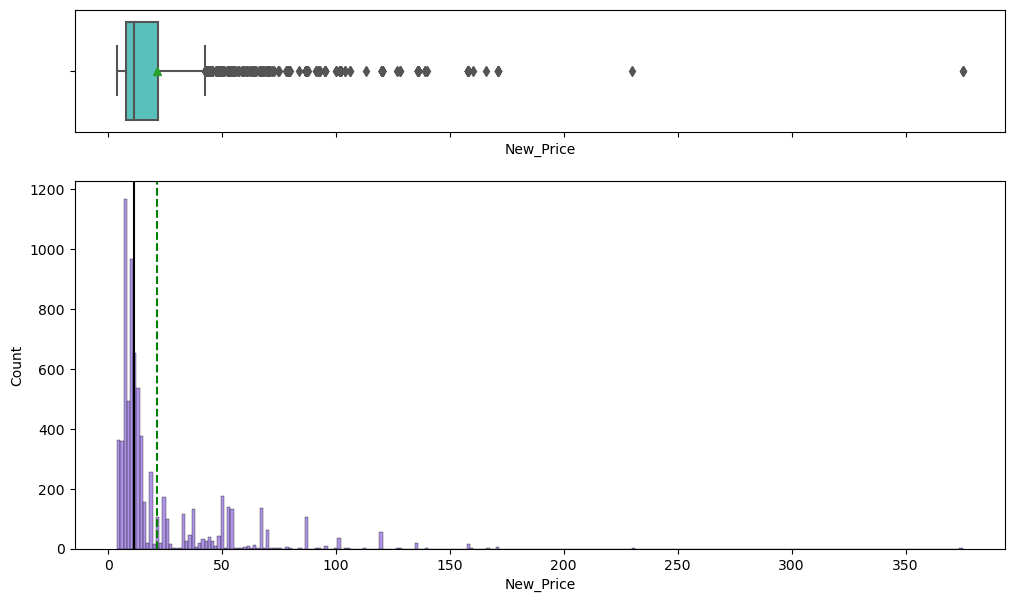

In [15]:
histogram_boxplot(data, 'New_Price');

* The price of new cars contain many outliers
* Prices for new cars are highly right skewed

## What is the market share of different brands in the used car market?

In [16]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [17]:
data['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64

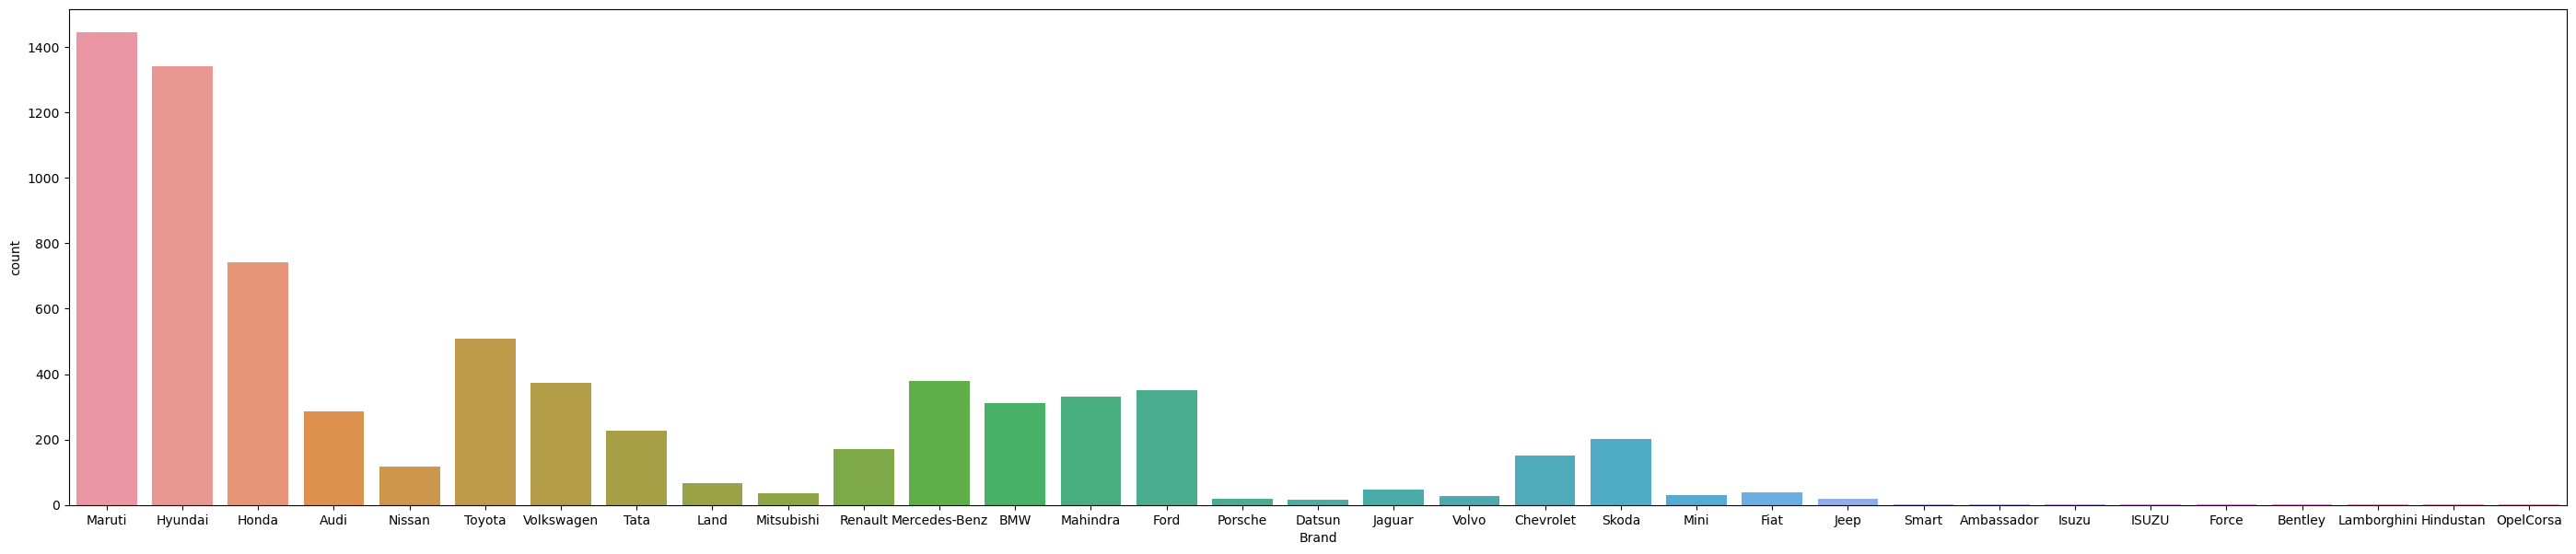

In [18]:
plt.figure(figsize=(35,7))
sns.countplot(data=data, x='Brand');

* Maruti, Hyundai, and Honda have a 48% combined total market share in the used car market 
* Maruti has 20% market share
* Hyundai has 18% market share
* Honda has 10% market share

## What is the market share of different types of fuels in the used car market?

In [19]:
data['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

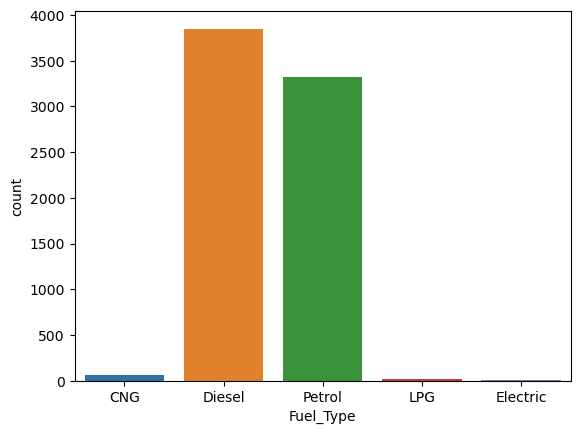

In [20]:
sns.countplot(data=data, x='Fuel_Type');

Diesel and Petrol fuel cars have 98% of the total market share for used cars. 

### Observations on Transmissions

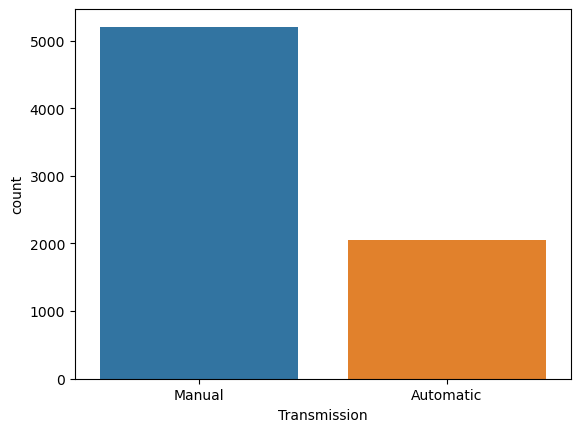

In [21]:
sns.countplot(data=data, x='Transmission');

Most cars in the market right now have a Manual transmission

### Observations on Owner Type

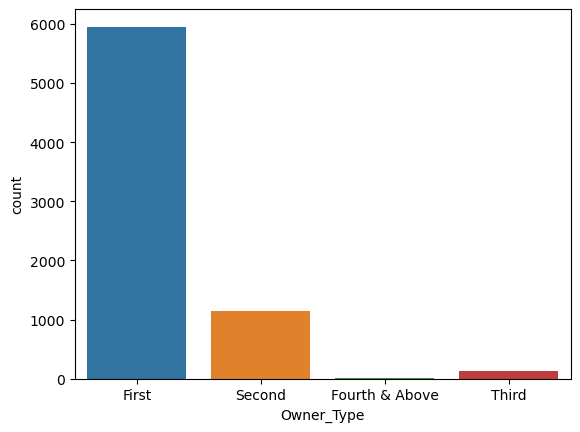

In [22]:
sns.countplot(data=data, x='Owner_Type');

Most cars being sold on the market are being sold by the first owner. 

## How does the prices of used cars vary by car brand?

In [23]:
average_by_price = data.groupby('Brand')['Price'].mean()
average_by_price.sort_values(ascending=False)

Brand
Lamborghini      120.000000
Bentley           59.000000
Porsche           48.348333
Land              39.259500
Jaguar            37.632250
Mini              26.896923
Mercedes-Benz     26.809874
Audi              25.537712
BMW               25.243146
Isuzu             20.000000
Volvo             18.802857
Jeep              18.718667
ISUZU             12.045000
Toyota            11.580024
Mitsubishi        11.058889
Force              9.333333
Mahindra           8.045919
Skoda              7.559075
Ford               6.889400
Renault            5.799034
Honda              5.411743
Hyundai            5.343433
Volkswagen         5.307270
Nissan             4.738352
Maruti             4.517267
Tata               3.562849
Fiat               3.269286
Datsun             3.049231
Chevrolet          3.044463
Smart              3.000000
Ambassador         1.350000
Hindustan               NaN
OpelCorsa               NaN
Name: Price, dtype: float64

Prices vary significantly by brand, the most expensive brands are the luxury brands. 

## How does the prices of used cars vary by location?

In [24]:
average_by_location = data.groupby('Location')['Price'].mean()
average_by_location.sort_values(ascending=False)

Location
Coimbatore    15.078223
Bangalore     13.328631
Kochi         11.179186
Hyderabad      9.776550
Delhi          9.707726
Mumbai         9.429329
Ahmedabad      8.457321
Chennai        7.753623
Pune           6.726254
Jaipur         5.809225
Kolkata        5.661215
Name: Price, dtype: float64

The price of used cars cost the most in Coimbatore, Bangalore, and Kochi. While used cars cost the least in Pune, Jaipur, and Kolkata.

## What are the attributes that have a strong correlation with the price of used cars?

<AxesSubplot:>

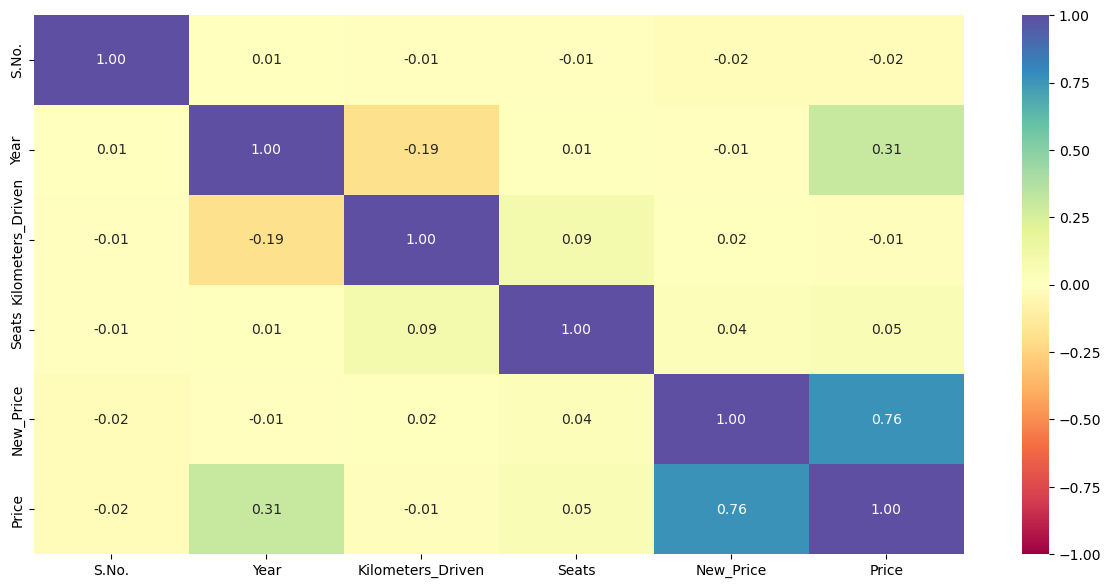

In [25]:
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

The New Price of a car has strong correlation to the price of a used car. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
 14  Brand              7253 non-null   object 
 15  Model              7253 non-null   object 
dtypes: float64(3), int64(3),

Since Price is missing 1234 rows imputing would make the data unreliable and effect the performance of our model. 

So let's drop null values from Price. 

In [27]:
data.dropna(subset=["Price"], inplace =True)
data.reset_index(drop =True, inplace=True)

### We can drop the `name` column

In [28]:
data.drop(["Name"], axis=1, inplace=True)

# let's check the summary of our data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,6019.0,NaN,NaN,NaN,3009.0,1737.679967,0.0,1504.5,3009.0,4513.5,6018.0
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017,442,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5983,146,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5876,371,74 bhp,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's convert the `engine` column from string to numeric.

In [29]:
def string_to_int(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "CC" in var:  # checking for the displacement volume in the engine
            value = (
                int(var.replace("CC", ""))
            )  # convert string to int
            return value
    else:
        return np.nan  # will return NaN if value is not string

In [30]:
data["Engine"] = data["Engine"].apply(string_to_int, "")
data.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,5.51,1.75,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,8.61,4.50,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,11.27,6.00,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8 bhp,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic


In [31]:
data["Engine"].describe()

count     5983
unique     146
top       1197
freq       606
Name: Engine, dtype: int64

* There's a major difference between the 75th percentile and the max which indicates right skewness

### Treat `engine` for missing values, replace missing values with the median

In [32]:
data["Engine"].fillna(data.Engine.median(), inplace=True)
data.isnull().sum()

S.No.                  0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                143
Seats                 42
New_Price              0
Price                  0
Brand                  0
Model                  0
dtype: int64

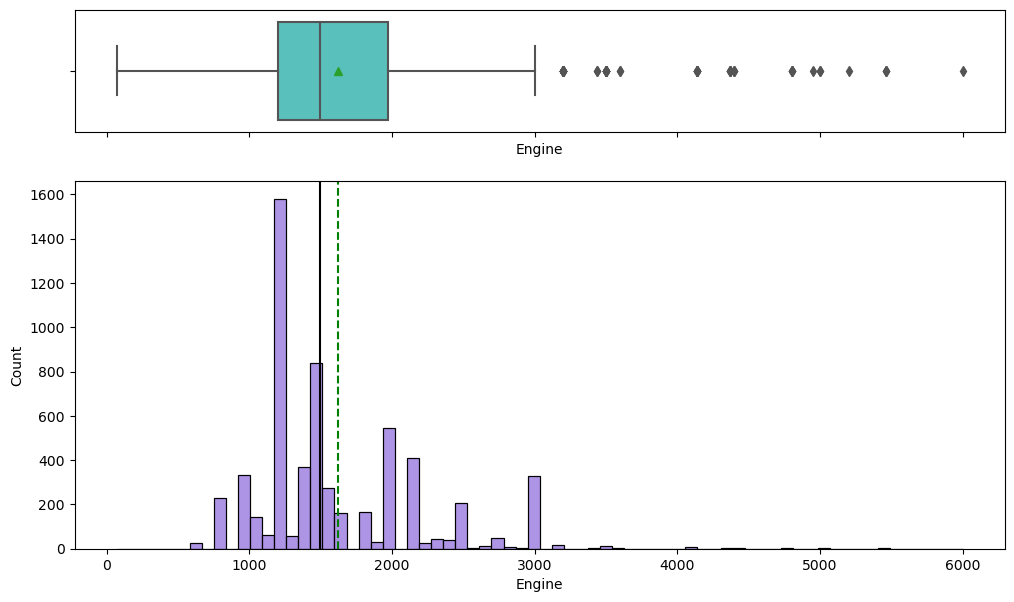

In [33]:
histogram_boxplot(data, 'Engine');

* There are many outliers in the Engine column
* The data slightly skewed to the right

### Let's convert the `Power` column from string to numeric.

In [34]:
def convert_power(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "bhp" in var:  # checking for the displacement volume in the engine
            value = (
                float(var.replace("bhp", ""))
            )  # convert string to int
            return value
    else:
        return np.nan  # will return NaN if value is not string

In [35]:
data["Power"] = data["Power"].apply(convert_power)
data.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.75,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.00,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.74,Audi,A4 New 2.0 TDI Multitronic


In [36]:
data['Power'].describe()

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

* 50% of engines have less than or equal to 94 bhp
* There's seem to be a large difference between the 75th percentile and the max for Power which indicates that there may be some skewness

### Treat `power` for missing values, replace missing values with the median

In [37]:
data["Power"].fillna(data.Power.median(), inplace=True)
data.isnull().sum()

S.No.                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
New_Price             0
Price                 0
Brand                 0
Model                 0
dtype: int64

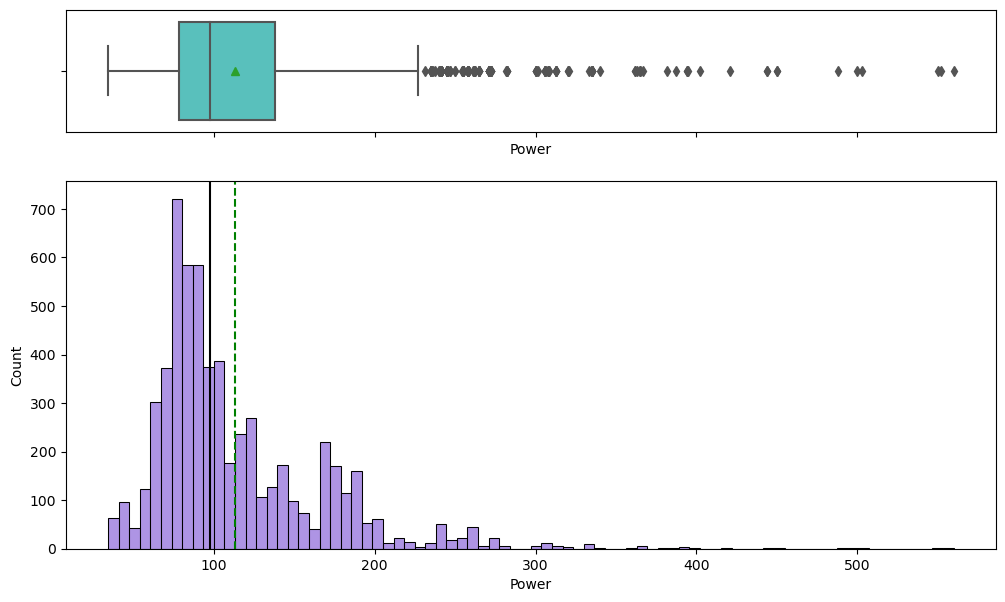

In [38]:
histogram_boxplot(data, 'Power');

* The data is highly right skewed
* There are many outliers in the data

### Perform Log Transformations on the Power column

In [39]:
data['Power_log'] = np.log(data['Power'])

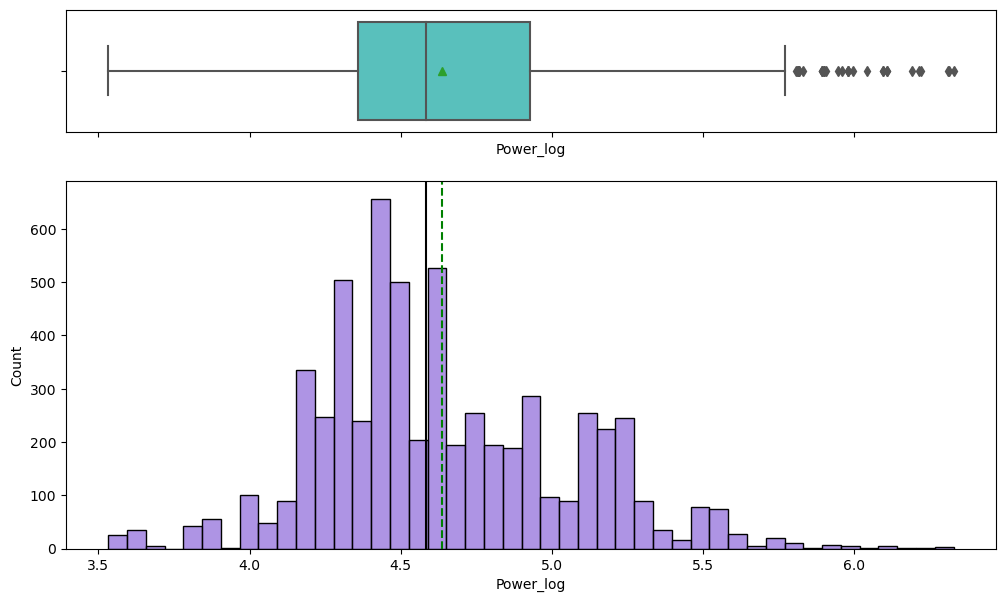

In [40]:
histogram_boxplot(data, 'Power_log');

The Power column almost looks normal distributed but you can still slightly see some skewness. 

In [41]:
### Replace seats missing values with the median

data["Seats"].fillna(data.Seats.median(), inplace=True)
data.isnull().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Model                0
Power_log            0
dtype: int64

### Observations on Kilometers Driven

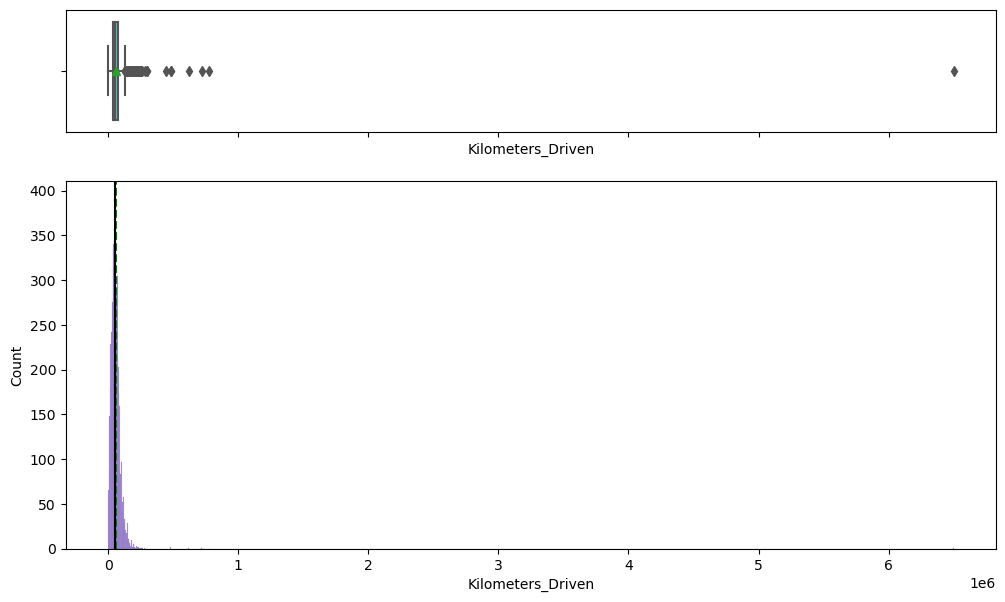

In [42]:
histogram_boxplot(data, 'Kilometers_Driven');

* Kilometers driven appears to be right skewed
* There are several outliers
* This column may need to be scaled to gain deeper insights into what's going on

### Perform Log Transformations on the Kilometers Driven column

In [43]:
data['Kilometers_Driven_Log'] = np.log(data['Kilometers_Driven'])

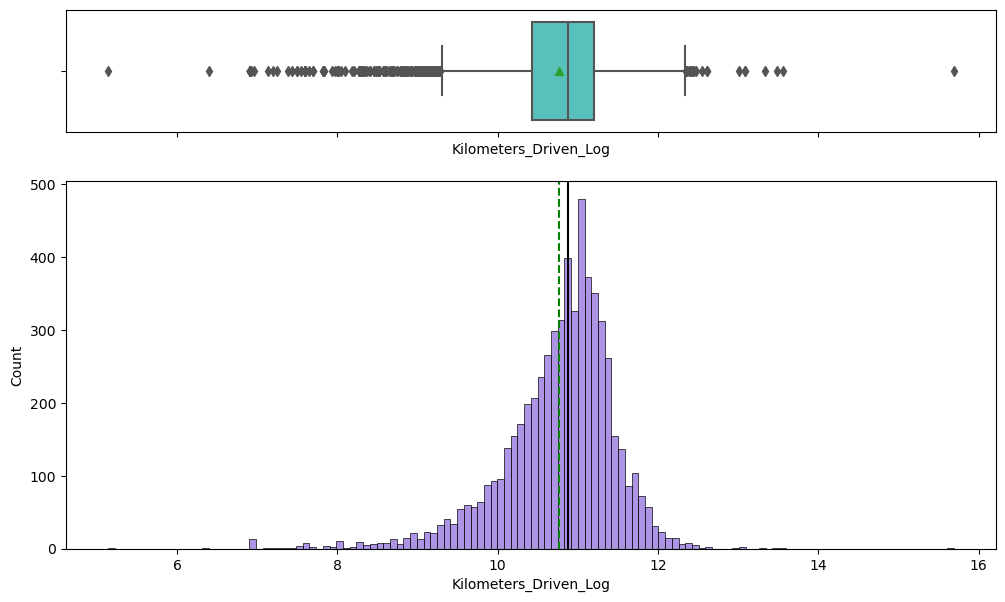

In [44]:
histogram_boxplot(data, 'Kilometers_Driven_Log');

There's still slightly some skewness but Kilometers_Driven looks so much better.

### Perform Log Transformations on the Price column


In [45]:
data['New_Price_Log'] = np.log(data['New_Price'])

In [46]:
data.drop(["New_Price"], axis=1, inplace=True)

<AxesSubplot:xlabel='New_Price_Log', ylabel='Count'>

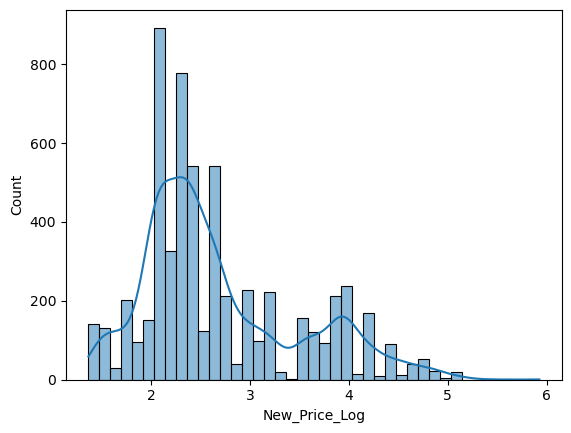

In [47]:
sns.histplot(data=data, x='New_Price_Log', kde=True)

* New Price is still slightly right skewed
* Most of the prices are on the lower end up the distribution

### Let's convert mileage into numerical values and treat missing values

In [48]:
def convert_mileage(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "kmpl" in var:  # checking for the displacement volume in the engine
            value = (
                float(var.replace("kmpl", ""))
            )  # convert string to int
            return value
        elif "km/kg" in var:
            value = (
                float(var.replace("km/kg", ""))
            )  # convert string to int
            return value
    else:
        return np.nan  # will return NaN if value is not string

In [49]:
data["Mileage"] = data["Mileage"].apply(convert_mileage)
data.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Power_log,Kilometers_Driven_Log,New_Price_Log
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,4.063198,11.184421,1.706565
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,4.837868,10.621327,2.776332
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V,4.485260,10.736397,2.152924
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,4.485936,11.373663,2.422144
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,4.947340,10.613246,3.972930


In [50]:
data['Mileage'].describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [51]:
data["Mileage"].fillna(data.Mileage.mean(), inplace=True)
data.isnull().sum()

S.No.                    0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Brand                    0
Model                    0
Power_log                0
Kilometers_Driven_Log    0
New_Price_Log            0
dtype: int64

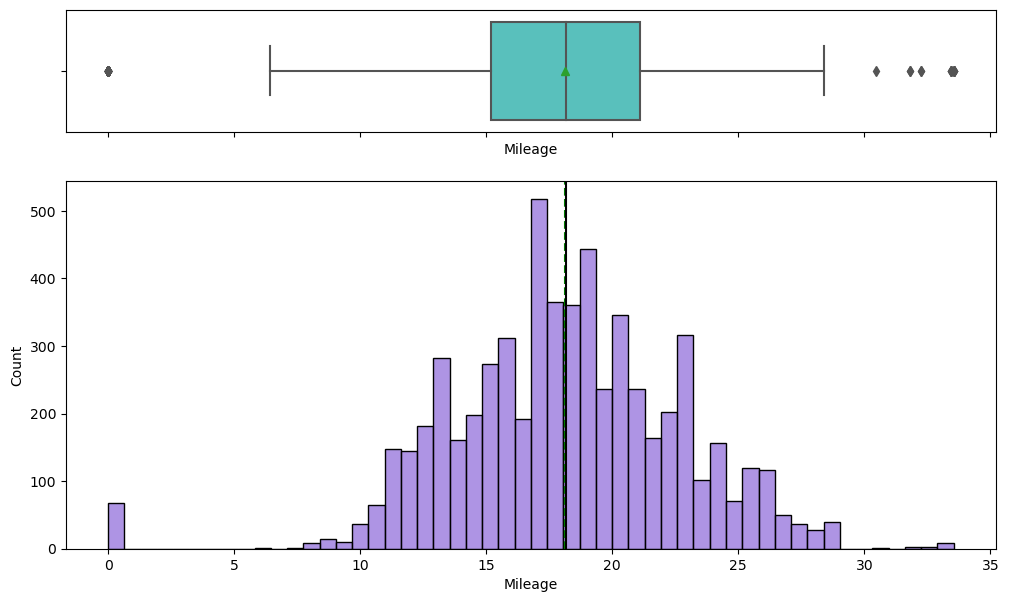

In [52]:
histogram_boxplot(data, 'Mileage');

* Mileage has a normal distribution
* There are a few outliers
* 50% of cars have between 0 and 18 in mileage

In [53]:
data['Model'].unique()

array(['Wagon R LXI CNG', 'Creta 1.6 CRDi SX Option', 'Jazz V', ...,
       'Polo IPL II 1.2 Petrol Highline', 'Bolt Revotron XT',
       'Xylo D4 BSIV'], dtype=object)

There are two many values in the Model column which would make our dimension too large. 

In [54]:
model_df = pd.DataFrame(
    data.Model.values.flatten(), columns=["Model"]
)
val_c = model_df.Model.value_counts()
val_c

XUV500 W8 2WD               49
Swift VDI                   45
City 1.5 S MT               34
Swift Dzire VDI             34
Swift VDI BSIV              31
                            ..
Fiesta Titanium 1.5 TDCi     1
Scorpio S10 AT 4WD           1
i20 1.2 Era                  1
Camry W4 (AT)                1
Xylo D4 BSIV                 1
Name: Model, Length: 1876, dtype: int64

In [55]:
# we take 100 as threshold
threshold = 25
val_c[val_c.values >= threshold]

XUV500 W8 2WD          49
Swift VDI              45
City 1.5 S MT          34
Swift Dzire VDI        34
Swift VDI BSIV         31
Ritz VDi               30
i10 Sportz             30
Fortuner 3.0 Diesel    29
Amaze S i-Dtech        27
Grand i10 Sportz       27
Ertiga VDI             25
Brio S MT              25
Name: Model, dtype: int64

In [56]:
model_list = val_c[val_c.values >= threshold].index.tolist()
model_val = []

for i in range(data.shape[0]):  # iterate over all rows in data
    txt = data.Model.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in model_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if model name is in the row
            model_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of model considered
        model_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
data["model_private"] = [item.strip("'") for item in model_val]
data.tail()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Power_log,Kilometers_Driven_Log,New_Price_Log,model_private
6014,6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,4.75,Maruti,Swift VDI,4.304065,10.217020,2.064328,Swift VDI
6015,6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,4.00,Hyundai,Xcent 1.1 CRDi S,4.262680,11.512925,2.107786,Others
6016,6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,2.90,Mahindra,Xylo D4 BSIV,4.718499,10.915088,2.457021,Others
6017,6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65,Maruti,Wagon R VXI,4.206184,10.736397,1.706565,Others
6018,6018,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,2.50,Chevrolet,Beat Diesel,4.053523,10.757903,2.424803,Others


In [57]:
data['model_private'].unique()

array(['Others', 'Ertiga VDI', 'Swift VDI', 'Amaze S i-Dtech',
       'i10 Sportz', 'Ritz VDi', 'XUV500 W8 2WD', 'Fortuner 3.0 Diesel',
       'Brio S MT', 'City 1.5 S MT', 'Swift Dzire VDI'], dtype=object)

### Drop the model column

In [58]:
data.drop(["Model"], axis=1, inplace=True)

We were able to successfully preprocessing the Models column

## Let's reevaluate which attributes have a strong correlation with the price of used cars

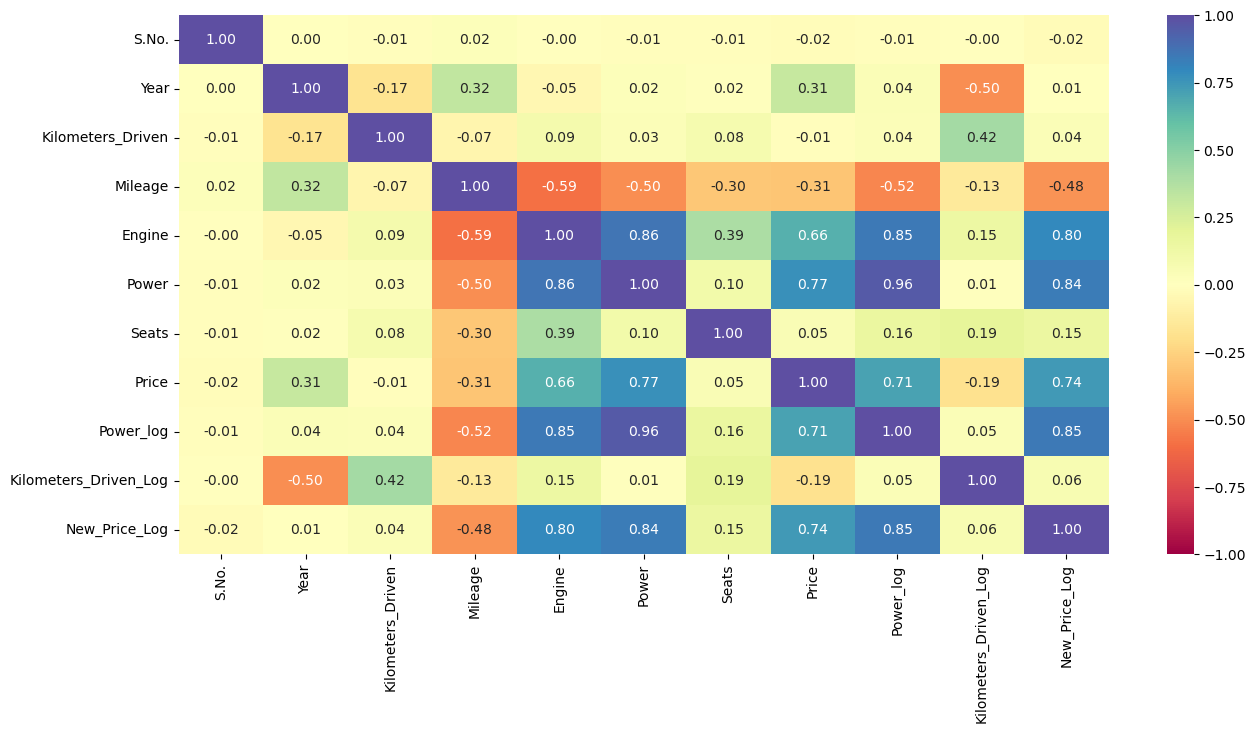

In [59]:
corr = data.corr()

# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Engine, Power, and New Price all show strong correlation with the price of used cars

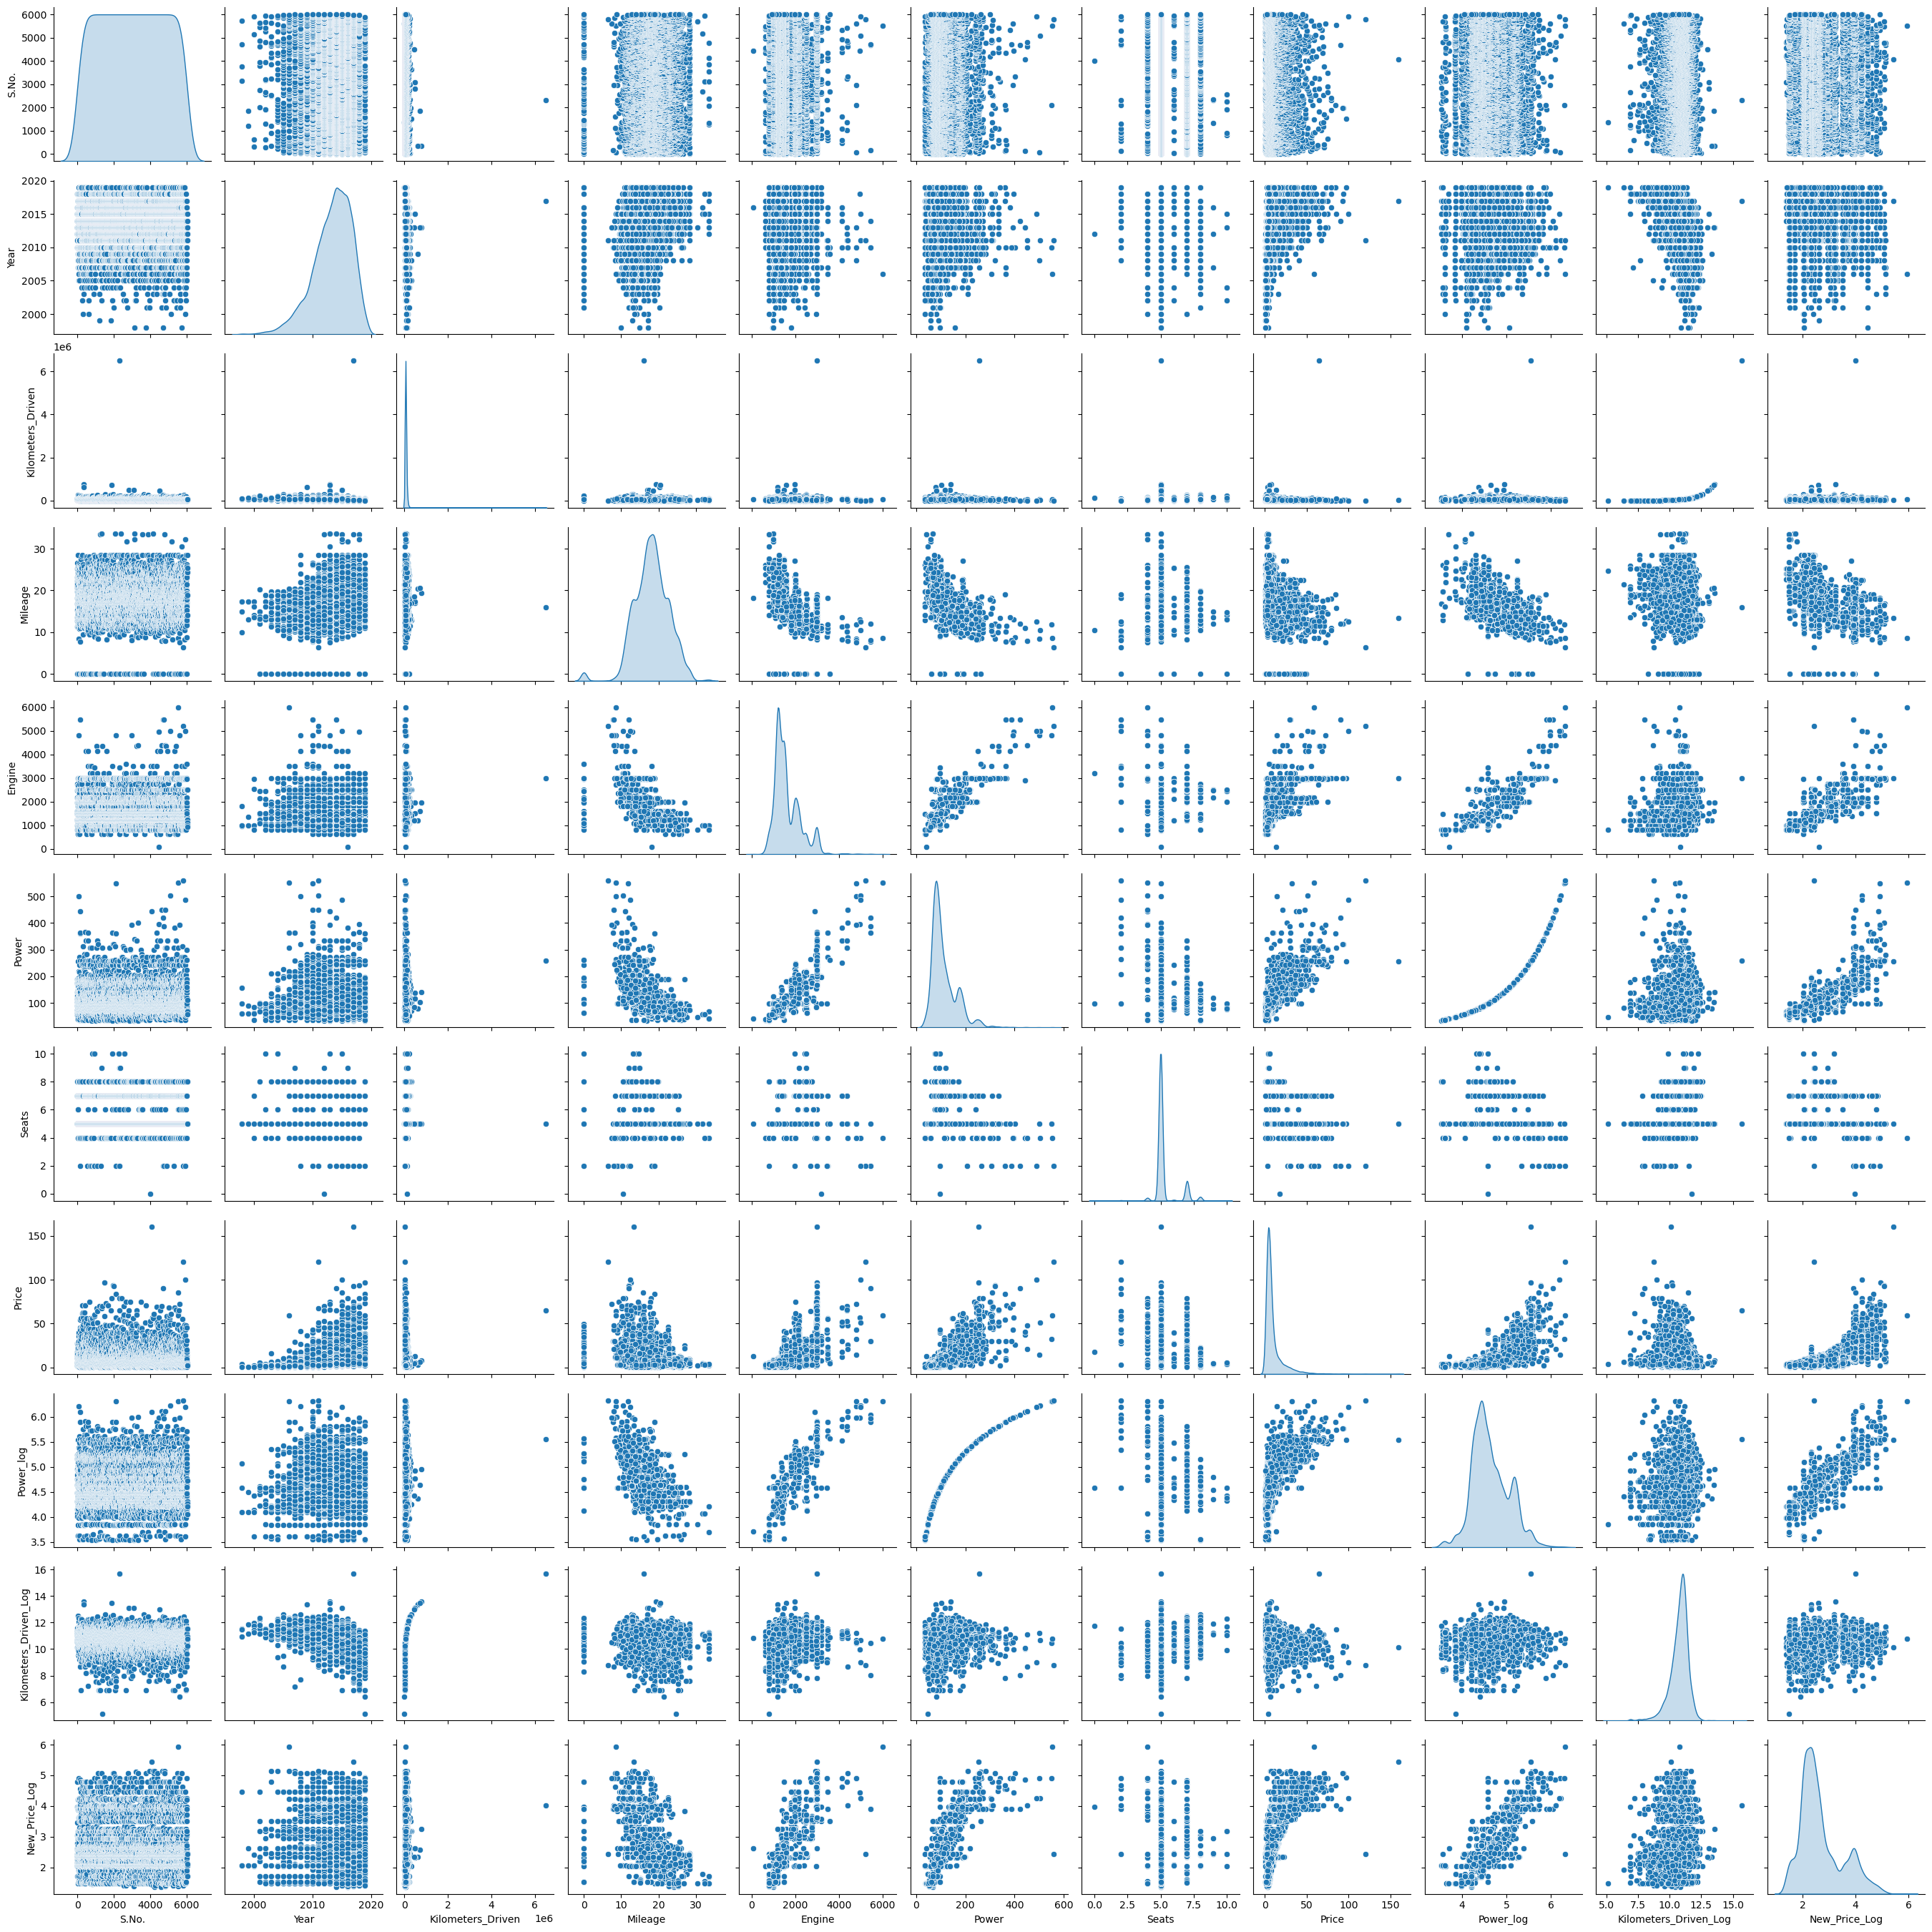

In [60]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

* Power and Engine share strong correlation
* The insights gathered from the correlation graph is similar

### We can drop the Power and Kilometers Driven columns

In [61]:
data.drop(["Power"], axis=1, inplace=True)
data.drop(["Kilometers_Driven"], axis=1, inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No.                  6019 non-null   int64  
 1   Location               6019 non-null   object 
 2   Year                   6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Mileage                6019 non-null   float64
 7   Engine                 6019 non-null   float64
 8   Seats                  6019 non-null   float64
 9   Price                  6019 non-null   float64
 10  Brand                  6019 non-null   object 
 11  Power_log              6019 non-null   float64
 12  Kilometers_Driven_Log  6019 non-null   float64
 13  New_Price_Log          6019 non-null   float64
 14  model_private          6019 non-null   object 
dtypes: f

### Create dummy variables to prepare for modeling

In [63]:
data = pd.get_dummies(data, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'model_private'], drop_first=True)

Fix error above and start checking the performance of the model

### Define dependent variable

In [64]:
X = data.drop(["Price"], axis=1)
y = data["Price"]

## Model Building - Linear Regression

### Split data into train and test

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
print("Number of rows in train data = ", x_train.shape[0])
print("Number of rows in test data = ", x_test.shape[0])

Number of rows in train data =  4213
Number of rows in test data =  1806


### Fit the Linear Model

In [67]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## Model Performance Check

In [68]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [69]:
### Get the R-square on the training set

print(
    "The score (R-squared) on the training set is ",
    lin_reg_model.score(x_train, y_train),
)

The score (R-squared) on the training set is  0.7551905828502596


In [70]:
# Checking model performance on train set
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.594917,3.041445,0.755191,0.751293,61.020387


## Model Performance Comparison

In [71]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.756158,2.849325,0.809514,0.802284,57.357702


#### Observations:

- The train and test R-square are 0.75 and 0.80, which indicates that the model explains 75% and 80% of the total variation in the train/test sets

- The RMSE is also comparable, the test set is slightly lower than the train set which is good. 

- Since the test data is performing better on the model compared to the train set its a good indicator that the model is not overfitting

## Actionable Insights and Recommendations 

### Insights:

- Looking at priced cars initially used cars are highly right skewed which indicates that cars are priced more so on the lower end compared to the higher end. 
- There are several cars on the market but Maruti, Hyundai, and Honda have an combined 48% of total market share. 
- Diesel and Petrol oil have combined 98% of the total market share for used cars, with Diesel being the most used oil. 
- Most cars being sold in the market are being sold by the first owner of the car
- Luxury brands are significantly higher than smaller brands. Luxury brands typically have a better reputation which could be the reason that they charge so much money.
- Coimbatore, Bangalore, and Kochi are the top three cities for used car sales
- The new price, engine, and power of a car has a strong correlation with the price of used cars.
- We have been able to build a predictive model that can be used by the team to predict the price of used cars with an $R^2$ of 0.75 on the training set.

### Recommendations:

- Target the top 3 cities for selling used cars such as Coimbatore, Bangalore, and Kochi
- Only sell Diesel or Petrol fuel cars
- Sell luxury cars with fewer used cars available that way you can increase the price due to limited supply
- Select used cars to sell that have a high power rating in which indicates a higher market price
- Leverage the linear regression model that we've created to continue to predict the future market price of used cars since the test data outperformed the training data